In [10]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates

data = pd.read_csv('./Delhi_air_quality_nearest_interpolate.csv')
matplotlib.style.use('ggplot')
figure(figsize=(6, 20))

<Figure size 600x2000 with 0 Axes>

<Figure size 600x2000 with 0 Axes>

In [12]:
df = data
df["Date"] = df["Date"].apply(pd.to_datetime)
df = df.set_index('Date')
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
Date,,,,,,,,,,,,
2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,472
2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,454
2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,143
2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,319
2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,325
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,112
2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,196
2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,233


In [13]:
for i, col in enumerate(df.columns):
    print(col)

PM2.5
PM10
NO
NO2
NOx
NH3
CO
SO2
O3
Benzene
Toluene
AQI


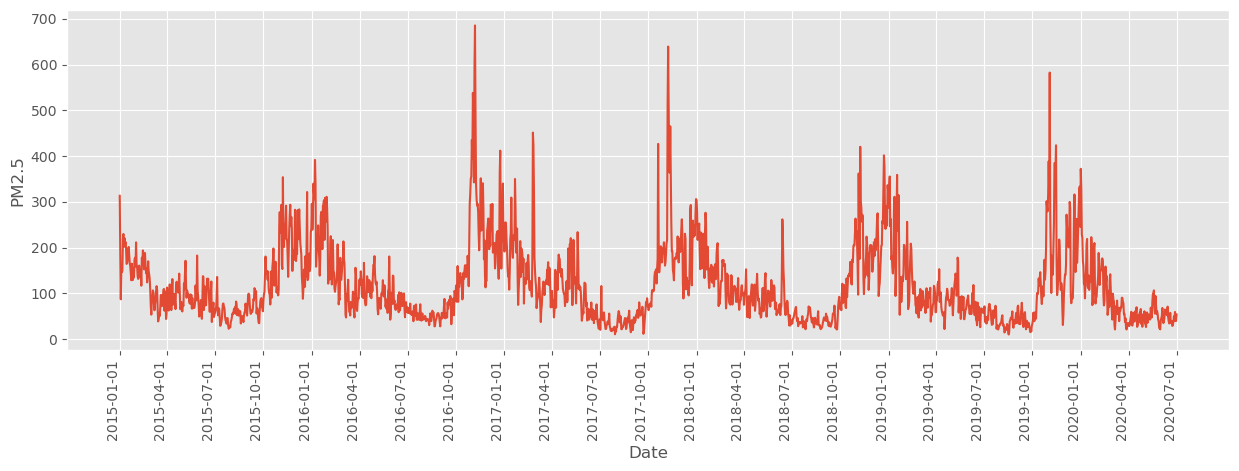

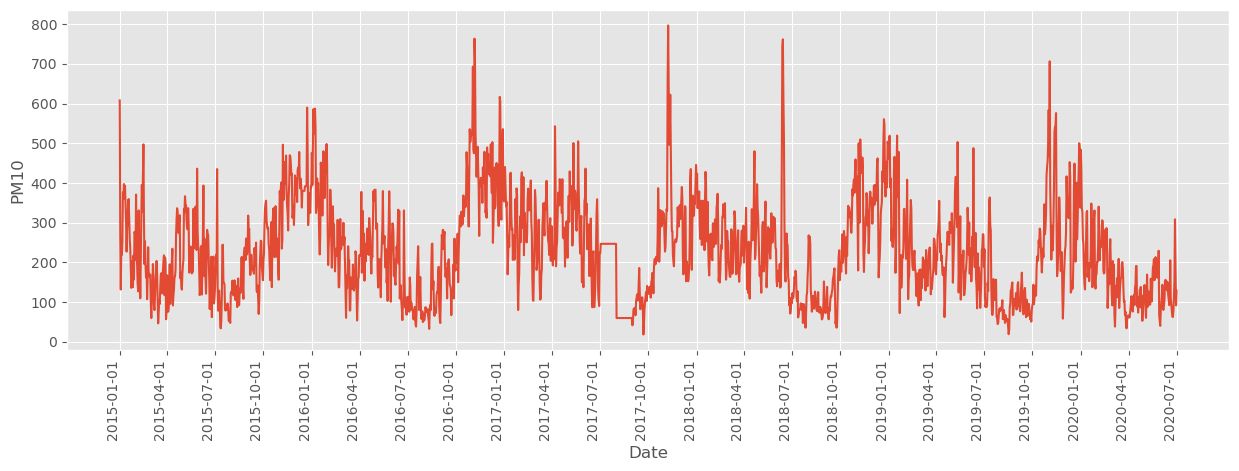

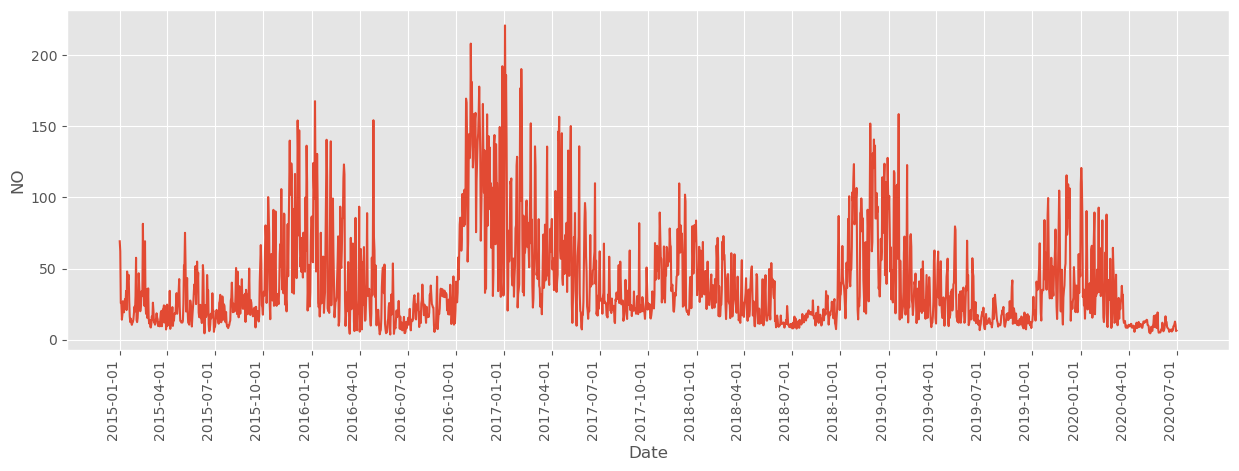

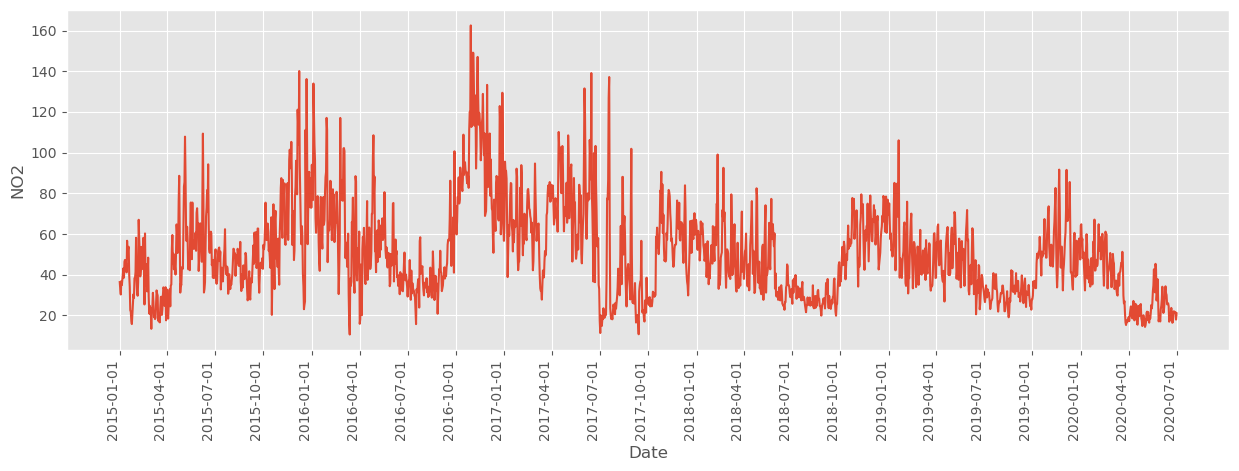

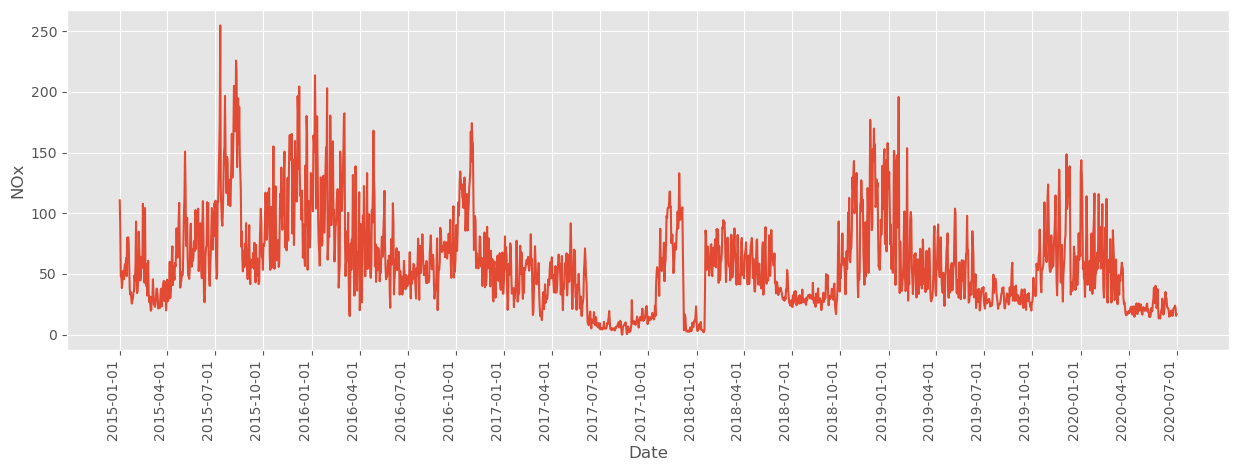

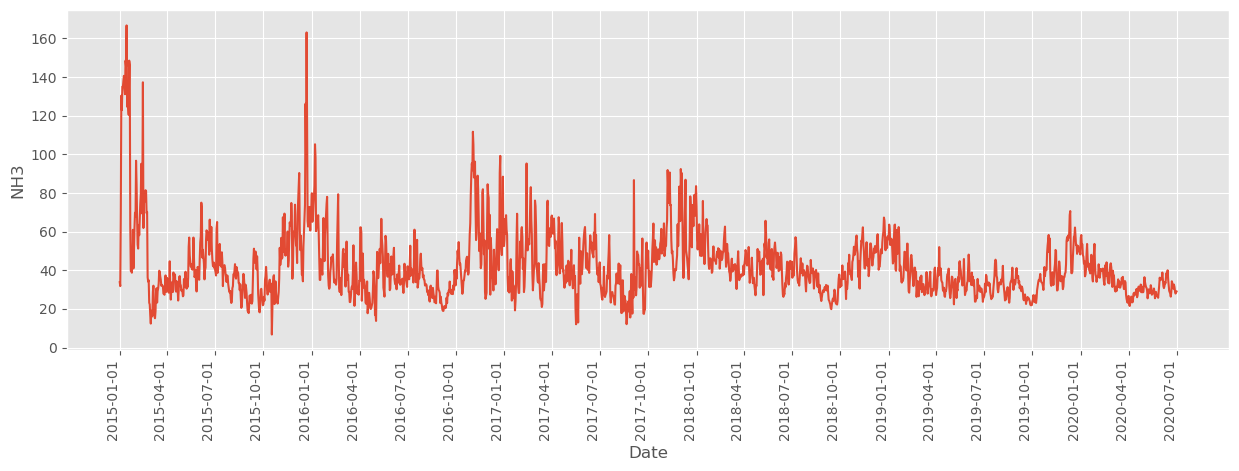

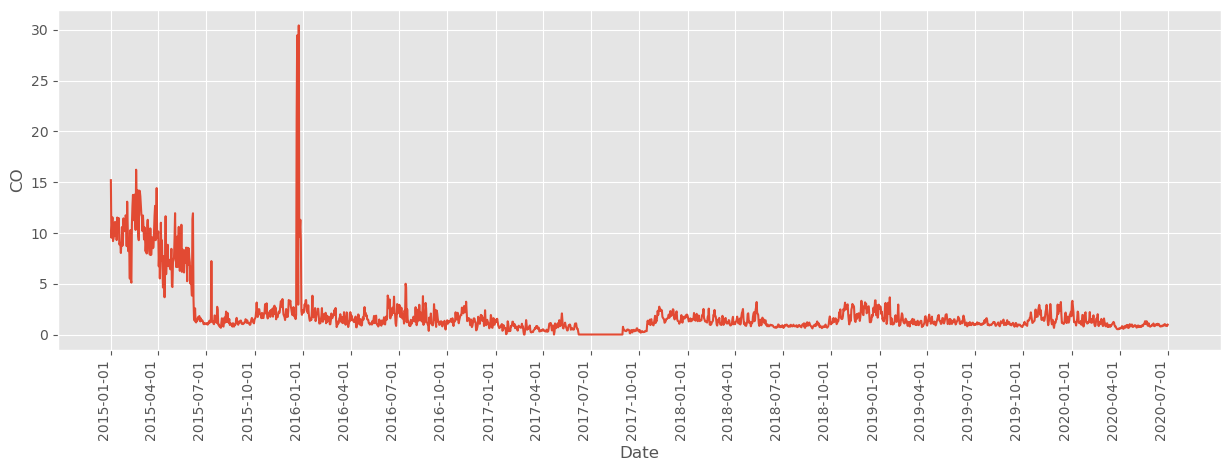

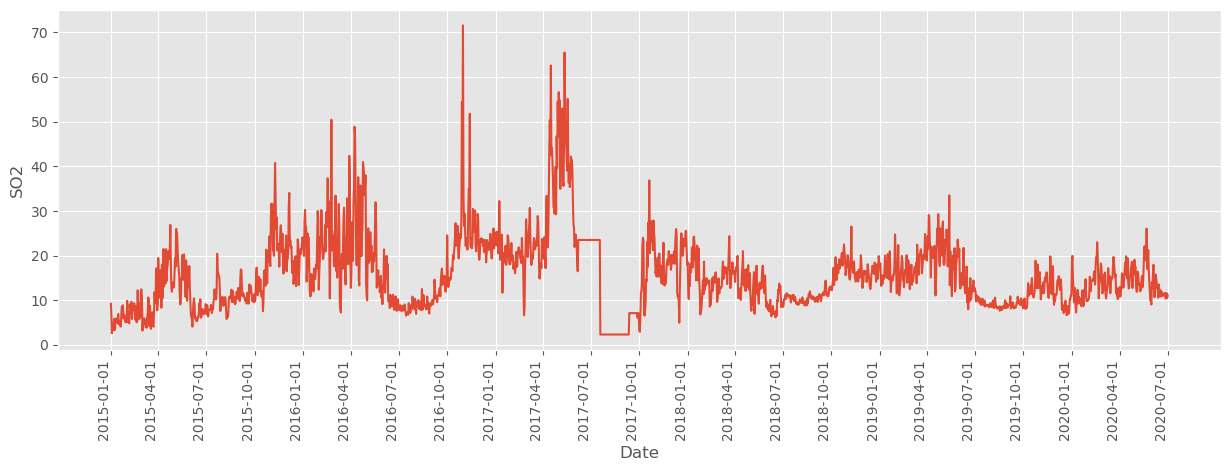

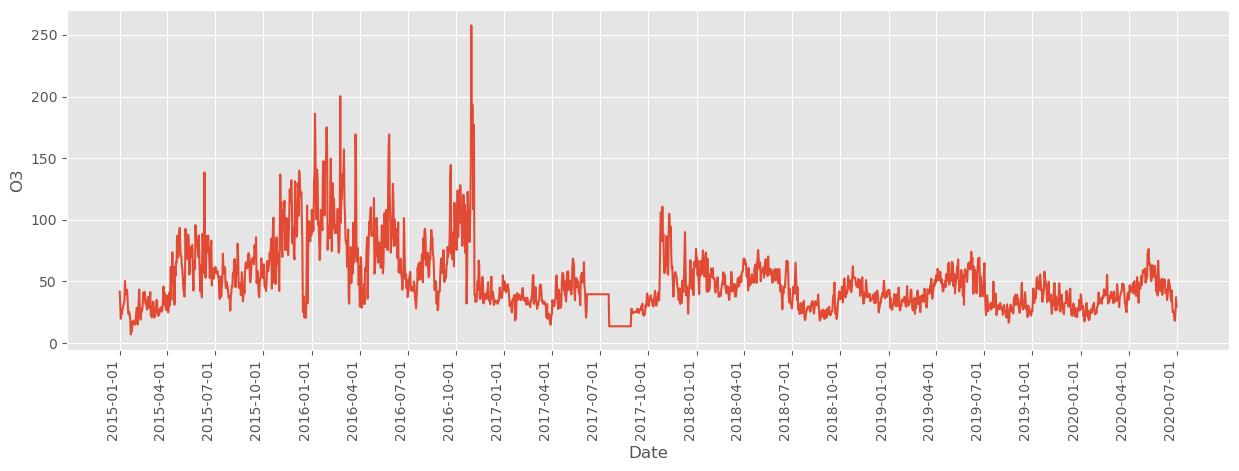

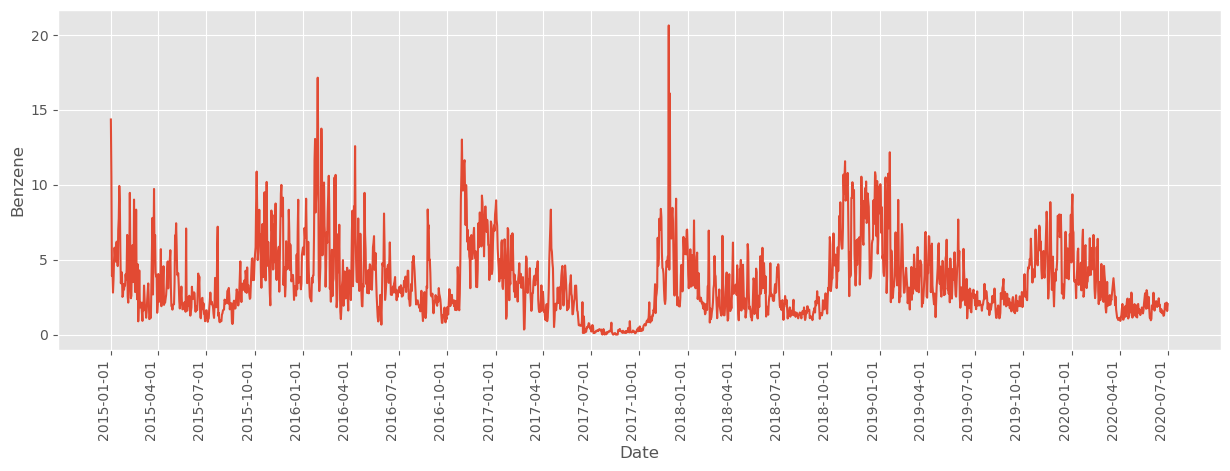

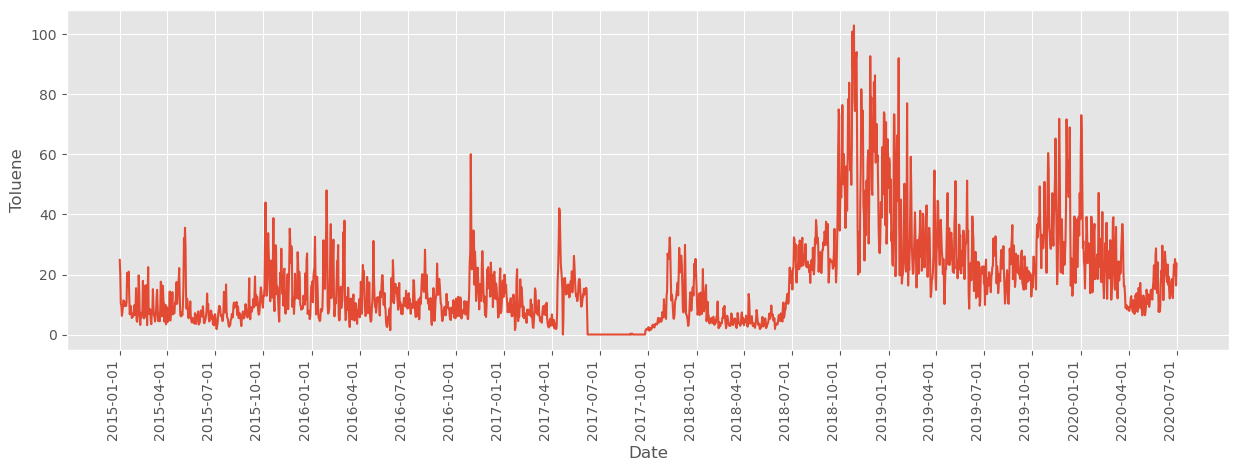

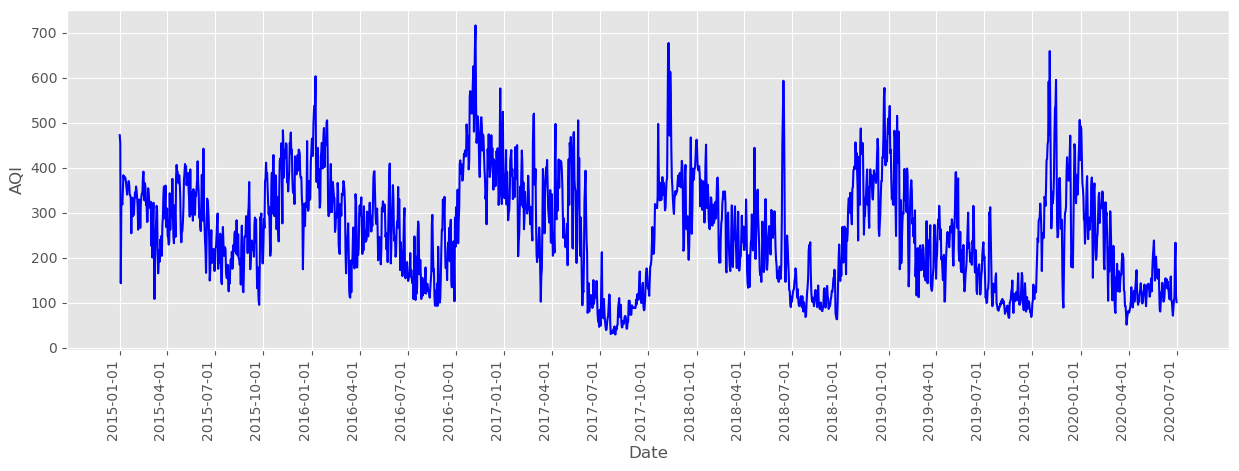

In [18]:
positions = [p for p in df.index
             if p.is_month_start
             and p.month in range(1, 13, 3)]

for i, col in enumerate(df.columns):
    plt.figure(i)
    if col != 'AQI':
        ax = df[col].plot(rot=90, figsize=(15,5), x_compat = True)
    else:
        ax = df[col].plot(rot=90, figsize=(15,5), color = 'blue', x_compat = True)
    
    #ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.set_xticks(positions)
    ax.set_ylabel(col)
    plt.savefig(f'figs/{i}.png')